# Маркетинговое исследование развлекательного приложения Procrastinate Pro+

**Цель исследования**

Необходимо подготовить исследование развлекательного приложения Procrastinate Pro+, разобраться в причине убытков  за последние несколько месяцев и помочь компании выйти в плюс.

**Описание данных**

Есть данные о пользователях, привлеченных с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях;
- выгрузка их покупок за этот период;
- рекламные расходы.

Мы будем работать с данными из следующих файлов:
- /datasets/visits_info_short.csv,
- /datasets/orders_info_short.csv,
- datasets/costs_info_short.csv.  

О качестве данных ничего не известно. Поэтому перед исследованием данных понадобится их обзор.

**Ход исследования**

Изучим общую информацию о датасетах. Что можно сказать о каждом столбце? Значения какого типа они хранят? 

Проверим данные на ошибки, и оценим их влияние на исследование, затем, на этапе предобработки, изучим возможность исправить самые критичные ошибки в данных.

Далее проведем необходимые вычисления, на основании которых проанализируем данные и, таким образом, исследование пройдёт в 6 этапов:

- [Загрузка и предобработка данных.](#1)
- [Функции для расчёта, анализа, визуализации LTV, ROI, удержания и конверсии:](#2)
  - Функция для создания профилей пользователей;
  - Функция для подсчета Retention Rate; 
  - Функция для подсчета конверсии;
  - Функция для подсчета LTV;
  - Функция для сглаживания данных;
  - Функция для построения графика Retention Rate;
  - Функция для построения графика конверсии;
  - Функция для визуализации LTV и ROI.
- [Исследовательский анализ данных:](#3)
  - Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей;
  - Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей;
  - Выясним, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи;
  - Изучим рекламные источники привлечения  и определим каналы, из которых пришло больше всего платящих пользователей.    
- [Маркетинг:](#4)
  - Посчитаем общую сумму расходов на маркетинг;
  - Выясним, как траты распределены по рекламным источникам;
  - Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику;
  - Выясним, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.
- [Оценка окупаемости рекламы:](#5)
  - Проанализируем окупаемость рекламы в целом;
  - Проверим конверсию пользователй и динамику ее изменения;
  - Проверим удержание пользователей и динамику его изменения;
  - Проанализируем окупаемость рекламы с разбивкой по устройствам;
  - Проанализируем окупаемость рекламы с разбивкой по странам;
  - Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.  
- [Общий вывод.](#6)

<a id="1"></a>

## Загрузим данные и подготовим их к анализу

### Загрузка и обзор данных

In [1]:
# Импорт библиотек.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# Читаем файлы, содержащие информацию о пользователях приложения, сохраняем их в переменные visits, orders, costs.
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')   
    costs = pd.read_csv('/datasets/costs_info_short.csv')                   
except:
    visits = pd.read_csv('visits.csv')
    orders = pd.read_csv('orders.csv')                    
    costs = pd.read_csv('costs.csv')                    

In [3]:
# Выводим на экран первые 5 строк датасетов.
display(visits.head())
display(orders.head())
display(costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [4]:
# Выводим основную информацию по датасету visits.
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


В таблице visits_info_short 6 столбцов, 309901 строк.

Согласно документации к данным:
1. User ID — уникальный идентификатор пользователя;
2. Region — страна пользователя;
3. Device — тип устройства пользователя;
4. Channel — идентификатор источника перехода;
5. Session Start — дата и время начала сессии;
6. Session End — дата и время окончания сессии.

Необходимо привести названия столбцов к единому синтаксису, а в стобцах Session Start и Session End поменять тип данных на datetime.

In [5]:
# Выводим основную информацию по датасету orders.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


В таблице orders_info_short 3 столбца, 40212 строк.

Согласно документации к данным:
1. User ID — уникальный идентификатор пользователя;
2. Event Dt — дата и время покупки;
3. Revenue — сумма заказа;

Необходимо привести названия столбцов к единому синтаксису, а в стобце Event Id поменять тип данных на datetime.

In [6]:
# Выводим основную информацию по датасету costs.
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


В таблице costs_info_short 3 столбца, 1800 строк.

Согласно документации к данным:
1. dt — дата проведения рекламной компании;
2. Channel — идентификатор рекламного источника;
3. costs — расходы на эту компанию;

Необходимо привести названия столбца Channel к единому синтаксису, а в стобце dt поменять тип данных на datetime.

In [7]:
# Выводим описание числовых данных, кроме столбцов с User ID.
display(orders['Revenue'].describe())
display(costs['costs'].describe())

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: Revenue, dtype: float64

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

В столбце Revenue датасета orders мы видим, что разброс по суммам заказа довольно большой, от 4.99 до 49.99 у.е., причем 75% покупок приходятся на минимальное значение 4.99, скорее всего имеют место быть выбросы, единичные дорогие покупки.
В столбце costs датасета costs также очень большой разброс данных по расходам на рекламные компании - от 0.8 у.е. до 630 у.е., 75% рекламных компаний обходится в сумму до 33.6 у.е., очень большое стандартное отклонение  - 107.7.

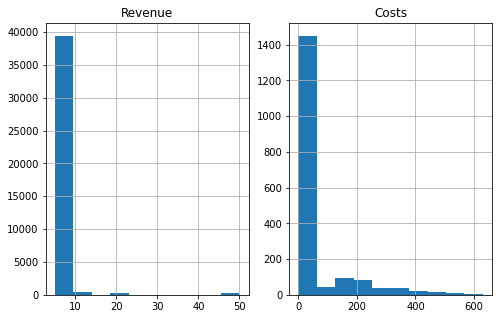

In [8]:
# Построим гистограммы для стобцов Revenue (из датасета orders) и costs (из датасета costs). 
orders['Revenue'].hist(figsize=(8, 5), ax=plt.subplot(1,2,1))
plt.title('Revenue');
costs['costs'].hist(figsize=(8, 5), ax=plt.subplot(1,2,2))
plt.title('Costs');

In [9]:
# Округлим значения стобцах с вещественным типом данных до 2 знаков после запятой.
pd.set_option('display.float_format', '{:.2f}'.format)

**Выводы:**

На данном этапе мы:
- Прочитали файлы с данными;
- Вывели и изучили общую информацию о них;

Впереди предобработка данных.

### Предобработка данных

#### Приведем названия стобцов к единой стилистике

In [10]:
visits.columns = [name.lower().replace(' ', '_') for name in visits.columns]

In [11]:
orders.columns = [name.lower().replace(' ', '_') for name in orders.columns]

In [12]:
costs.columns = costs.columns.str.lower()

#### Преобразуем типы данных, где необходимо

In [13]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [14]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [15]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

#### Проверим пропуски в датасетах

In [16]:
# Создадим копии датасетов до преобразований.
temp = visits.copy() 
len(temp)

309901

In [17]:
temp1 = orders.copy() 
len(temp1)

40212

In [18]:
temp2 = costs.copy() 
len(temp2)

1800

In [19]:
# Выведем количество пропущенных значений для каждого стобца всех датасетов и отсортируем по возрастанию.
visits.isna().sum().sort_values()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [20]:
orders.isna().sum().sort_values()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [21]:
costs.isna().sum().sort_values()

dt         0
channel    0
costs      0
dtype: int64

Пропусков в датасетах нет.

#### Изучим дубликаты  в датасетах

In [22]:
# Напишем функцию для проверки данных на наличие явных и неявных дубликатов.
def duplicates(dataset):
    return display(f'Явные дубликаты: {dataset.duplicated().sum()}', 
            f'Неявные дубликаты: {dataset.duplicated()}')

In [23]:
dataset = visits
duplicates(dataset)

'Явные дубликаты: 0'

'Неявные дубликаты: 0         False\n1         False\n2         False\n3         False\n4         False\n          ...  \n309896    False\n309897    False\n309898    False\n309899    False\n309900    False\nLength: 309901, dtype: bool'

In [24]:
dataset = orders
duplicates(dataset)

'Явные дубликаты: 0'

'Неявные дубликаты: 0        False\n1        False\n2        False\n3        False\n4        False\n         ...  \n40207    False\n40208    False\n40209    False\n40210    False\n40211    False\nLength: 40212, dtype: bool'

In [25]:
dataset = costs
duplicates(dataset)

'Явные дубликаты: 0'

'Неявные дубликаты: 0       False\n1       False\n2       False\n3       False\n4       False\n        ...  \n1795    False\n1796    False\n1797    False\n1798    False\n1799    False\nLength: 1800, dtype: bool'

Дубликаты невыявлены.

In [26]:
# Сверяем наши данные по количеству строк по окончанию обработки даных во всех датасетах.
a, b = len(temp), len(visits)
print(len(temp), len(visits), round((a - b) / a * 100, 2))

309901 309901 0.0


In [27]:
a, b = len(temp1), len(orders)
print(len(temp1), len(orders), round((a - b) / a * 100, 2))

40212 40212 0.0


In [28]:
a, b = len(temp2), len(costs)
print(len(temp2), len(costs), round((a - b) / a * 100, 2))

1800 1800 0.0


**Выводы:**
- Привели названия столбцов к единой стилистике;
- Преобразовали типы данных, где было необходимо; 
- Проверили данные на пропуски - их нет;
- Проверили данные на дубликаты - их нет.

<a id="2"></a>

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


### Функция get_profiles() для создания профилей пользователей

In [29]:
def get_profiles(
    sessions, 
    orders, 
    ad_costs, # параметр ad_costs - траты на рекламу
    event_names=[]
): 

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим певые значения session_start, channel, device, region
    # столбец с временем первого посещения назовем first_ts
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            })
        .rename(columns={'session_start': 'first_ts'})
        .reset_index() # возвращаем user_id из индекса
    )

    # для последующего когортного анализа определяем дату первого посещения и первый день месяца, когда это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # проверяем есть ли ID пользователей из profiles в orders
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            # проверяем, встречается ли каждый пользователь среди тех, кто совершил событие event
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            ) 
            
    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'}) # столбец с числом пользователей назовем unique_users
        .reset_index() # возвращаем dt и channel из индексов
    )
    
    # объединяем траты на рекламу и число привлечённых пользователей по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    
    # стоимость привлечения органических пользователей равна нулю, т.к. они не связаны с данными о рекламе, 
    # у них значение NaN, заменим его на ноль
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция get_retention() для подсчета Renention Rate

In [30]:
def get_retention(
    profiles, 
    sessions, 
    observation_date, 
    horizon_days, 
    dimensions=[], 
    ignore_horizon=False,
):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем "сырые" данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    # добавляем функцию для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        
        # строим "треугольную" таблицу
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        
        # определяем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
             )
        
        # добавляем размеры когорт к "треугольной" таблице
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # делим каждую "ячейку" на соответствующий размер когорты и получаем Retention Rate
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и "сырые" данные
    return result_raw, result_grouped, result_in_time

### Функция get_conversion() для подсчета конверсии

In [31]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        
        # построим таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        
        # посчитаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis=1)
        
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        
        # объединяем таблицы размеров когорт и конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # делим каждую "ячейку" в строке на размер когорты и получаем Conversion Rate
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и "сырые" данные
    return result_raw, result_grouped, result_in_time

### Функция get_ltv() для подсчета LTV

In [32]:
def get_ltv(
    profiles, # получаем профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    # функция группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем по две таблицы LTV  и ROI, и "сырые" данные
    return result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time 

### Функция filter_data() для сглаживания данных

In [33]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функция plot_retention() для построения графика Renention Rate

In [34]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функция plot_conversion() для построения графика конверсии

In [35]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(20, 10))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функция plot_ltv_roi() для визуализации LTV и ROI

In [36]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id="3"></a>

## Исследовательский анализ данных


In [37]:
# Составим профили пользователей.
profiles = get_profiles(visits, orders, costs)
display(profiles.head()) 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.09
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.11
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.00
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.99
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.23


In [38]:
# Определим минимальную и максимальную даты привлечения пользователей.
min_analysis_date = profiles['dt'].min()
display('Минимальная дата привлечения клиентов:', min_analysis_date)
max_analysis_date = profiles['dt'].max()
display('Максимальная дата привлечения клиентов:', max_analysis_date)

'Минимальная дата привлечения клиентов:'

datetime.date(2019, 5, 1)

'Максимальная дата привлечения клиентов:'

datetime.date(2019, 10, 27)

**Выводы:**
- Составили таблицу профилей пользователей, вызвав функцию get_profiles;
- Минимальная дата привлечения пользователей  - 1 мая 2019 года (2019-05-01);
- Максимальная дата привлечения пользователей - 27 октября 2019 года (2019-10-27).

In [39]:
# Изучим список стран, откуда пользователи приходят в приложение.
country_list = profiles['region'].unique()
print(country_list)

['United States' 'France' 'Germany' 'UK']


In [40]:
# Найдем страну, на которую приходится больше всего платящих пользователей.
country_payment = profiles.groupby('region').agg(
    {'user_id': 'count','payer': 'sum'}).sort_values(by='payer', 
    ascending=False).reset_index()
country_payment.drop(columns=['user_id']).style.background_gradient('Blues')

,region,payer
0,United States,6902
1,UK,700
2,France,663
3,Germany,616


,region,user_id,percent
0,United States,100002,6.90
3,Germany,14981,4.11
1,UK,17575,3.98
2,France,17450,3.80


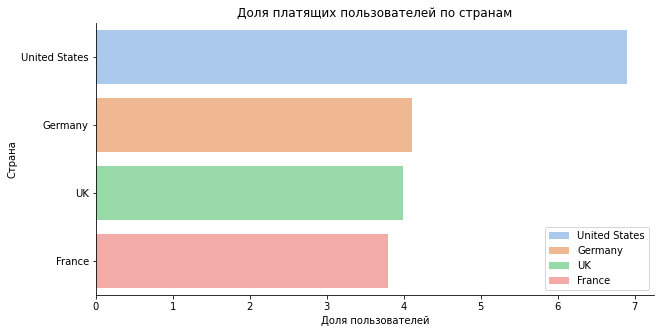

In [41]:
# Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
country_payment['percent'] = (country_payment['payer'] / country_payment['user_id']) * 100
display(country_payment.drop(columns=['payer']).sort_values(by='percent', 
    ascending=False).style.background_gradient('Blues').format({'percent':'{:.2f}'}))
## Построим столбчатую диаграмму доли платящих пользователей по странам.
plt.rcParams['figure.figsize']=[10,5] 
sns.barplot(
    data=country_payment.sort_values(by='percent', ascending=False), x='percent', y='region', 
    palette='pastel', hue='region', dodge = False).set(
    title='Доля платящих пользователей по странам')
plt.ylabel('Страна')
plt.xlabel('Доля пользователей')
plt.legend(loc='lower right')
sns.despine()
plt.show()

**Выводы:**
- Пользователи приходят в приложение из 4х стран: США, Великобритания, Франция, Германия;
- На США приходится больше всего платящих пользователей - 6.9% от общего числа пришедших, на Францию меньше всего - 3.8%.

In [42]:
# Изучим список устройств, которыми пользуются клиенты.
device_list = profiles['device'].unique()
print(device_list)

['Mac' 'iPhone' 'PC' 'Android']


In [43]:
# Выясним, какие устройства предпочитают платящие пользователи.
device_payment = profiles.groupby('device').agg(
    {'user_id': 'count','payer': 'sum'}).sort_values(by='payer', 
    ascending=False).reset_index()
device_payment.drop(columns=['user_id']).style.background_gradient('Blues')

,device,payer
0,iPhone,3382
1,Android,2050
2,Mac,1912
3,PC,1537


,device,user_id,percent
2,Mac,30042,6.36
0,iPhone,54479,6.21
1,Android,35032,5.85
3,PC,30455,5.05


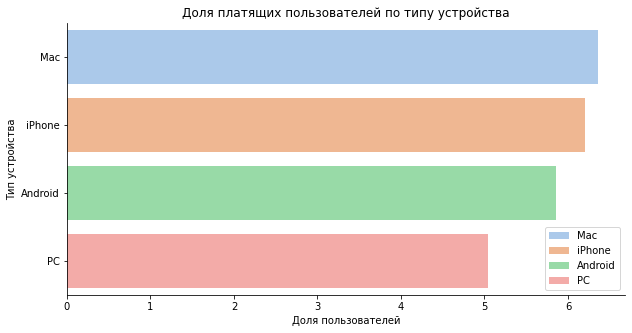

In [44]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
device_payment['percent'] = (device_payment['payer'] / device_payment['user_id']) * 100
display(device_payment.drop(columns=['payer']).sort_values(by='percent', 
    ascending=False).style.background_gradient('Blues').format({'percent':'{:.2f}'}))

## Построим столбчатую диаграмму доли платящих пользователей по типу устройства.
plt.rcParams['figure.figsize'] = [10,5] 
sns.barplot(
    data = device_payment.sort_values(by='percent', ascending=False), x='percent', y='device', 
    palette='pastel', hue='device', dodge=False).set(
    title='Доля платящих пользователей по типу устройства')
plt.ylabel('Тип устройства')
plt.xlabel('Доля пользователей')
plt.legend(loc='lower right')
sns.despine()
plt.show()

**Выводы:**
- Клиенты пользуются следующими устройствами: Mac, iPhone, PC, Android;
- Платящие пользователи с большим отрывом предпочитают iPhone;
- Самая большая доля платящих среди пользователей использует Mac - 6.36%, на втором месте iPhone - 6.21%.

In [48]:
# Изучим рекламные источники привлечения клиентов.
channel_list = profiles['channel'].unique()
print(channel_list)

['FaceBoom' 'organic' 'AdNonSense' 'YRabbit' 'MediaTornado'
 'RocketSuperAds' 'LeapBob' 'TipTop' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [49]:
# Найдем каналы, из которых пришло больше всего платящих пользователей.
channel_payment = profiles.groupby('channel').agg(
    {'user_id': 'count','payer': 'sum'}).sort_values(by='payer', 
    ascending=False).reset_index()
channel_payment.drop(columns=['user_id']).style.background_gradient('Blues')

,channel,payer
0,FaceBoom,3557
1,TipTop,1878
2,organic,1160
3,WahooNetBanner,453
4,AdNonSense,440
5,RocketSuperAds,352
6,LeapBob,262
7,OppleCreativeMedia,233
8,lambdaMediaAds,225
9,YRabbit,165


,channel,user_id,percent
0,FaceBoom,29144,12.20
4,AdNonSense,3880,11.34
8,lambdaMediaAds,2149,10.47
1,TipTop,19561,9.60
5,RocketSuperAds,4448,7.91
3,WahooNetBanner,8553,5.30
9,YRabbit,4312,3.83
10,MediaTornado,4364,3.57
6,LeapBob,8553,3.06
7,OppleCreativeMedia,8605,2.71


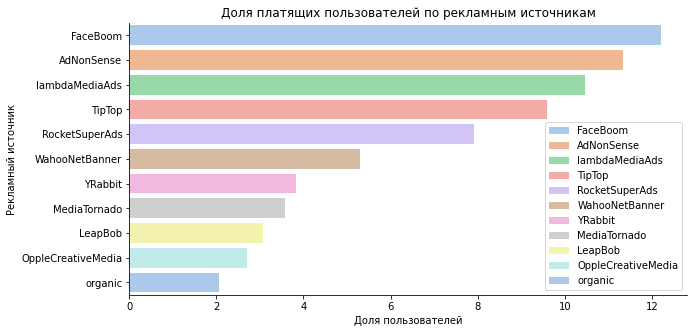

In [50]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.
channel_payment['percent'] = (channel_payment['payer'] / channel_payment['user_id']) * 100
display(channel_payment.drop(columns=['payer']).sort_values(
    by='percent', ascending=False).style.background_gradient('Blues').format({'percent':'{:.2f}'}))

## Построим столбчатую диаграмму доли платящих пользователей по рекламным источникам.
plt.rcParams['figure.figsize'] = [10,5] 
sns.barplot(
    data = channel_payment.sort_values(by='percent', ascending=False), x='percent', y='channel', 
    palette='pastel', hue='channel', dodge=False).set(
    title='Доля платящих пользователей по рекламным источникам')
plt.ylabel('Рекламный источник')
plt.xlabel('Доля пользователей')
plt.legend(loc='lower right')
sns.despine()
plt.show()

**Выводы:**
- Рекламных источников привлечения 10: FaceBoom, AdNonSense, YRabbit, MediaTornado, RocketSuperAds, LeapBob, TipTop, WahooNetBanner, OppleCreativeMedia, lambdaMediaAds плюс канал organic - пользователи, пришедшие сами, без рекламы;
- По количеству пришедших платящих пользователей наиболее выгодны каналы FaceBoom и TipTop, а также органические пользователи;
- В процентном соотношении по платящим от общего числа пользователей лидируют каналы FaceBoom (12.2%), AdNonSense (11.34%), lambdaMediaAds (10.47%), при этом в двух последних довольно небольшое по сравнению с первым каналом число пользователей, но доля платящих несильно ниже.

**Выводы по разделу Исследовательский анализ данных:**
- В данном разделе мы составили пользователи профилей;
- Минимальная дата привлечения клиентов: 1 мая 2019 года;
- Максимальная дата привлечения клиентов: 27 октября 2019 года;
- Пользователи приложения приходят из 4х стран: США, Великобритания, Германия и Франция. Больше всего платящих пользователей приходится на США - 6.9% от общего числа, во Франции меньше всего - 3.8%;
- Пользователи приложения пользуются следующими устройствами: Mac, iPhone, Android и PC. Платящие пользователи предпочитают iPhone, но самая большая доля платящих от общего числа пользователей приходится на Mac - 6.36%;
- Рекламных источников привлечения 10, не считая источника органических пользователей (organic): FaceBoom, AdNonSense, YRabbit, MediaTornado, RocketSuperAds, LeapBob, TipTop, WahooNetBanner, OppleCreativeMedia, lambdaMediaAds;
- По количеству пришедших платящих пользователей наиболее выгодны каналы FaceBoom и TipTop, а также органические пользователи;
- В процентном соотношении по платящим от общего числа пользователей расклад немного другой: FaceBoom - 12.2%, AdNonSense- 11.34%, lambdaMediaAds -10.47%, при этом необходимо учитывать, что в двух последних довольно небольшое по сравнению с первым каналом число пользователей, но доля платящих почти такая же.

<a id="4"></a>

## Маркетинг


In [51]:
# Посчитаем общую сумму расходов на маркетинг, используя данные из датасета costs.
costs_total = costs['costs'].sum()
display('Общая сумма затрат на рекламу: {:.2f}'.format(costs_total))

'Общая сумма затрат на рекламу: 105497.30'

,channel,acquisition_cost,percent
0,TipTop,54751.300000,51.90
1,FaceBoom,32445.600000,30.75
2,WahooNetBanner,5151.000000,4.88
3,AdNonSense,3911.250000,3.71
4,OppleCreativeMedia,2151.250000,2.04
5,RocketSuperAds,1833.000000,1.74
6,LeapBob,1797.600000,1.70
7,lambdaMediaAds,1557.600000,1.48
8,MediaTornado,954.480000,0.90
9,YRabbit,944.220000,0.90


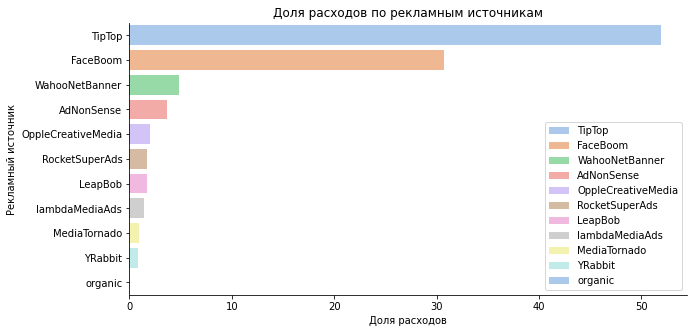

In [52]:
# Посмотрим, сколько денег потратили на каждый источник рекламы.
channel_costs = profiles.groupby('channel').agg(
    {'user_id': 'count','acquisition_cost': 'sum'}).sort_values(by='acquisition_cost', 
    ascending=False).reset_index()
channel_costs['percent'] = (channel_costs['acquisition_cost'] / costs_total) * 100
display(channel_costs.drop(columns=['user_id']).style.background_gradient('Blues').format({'percent':'{:.2f}'}))

## Построим столбчатую диаграмму доли расходов по рекламным источникам.
plt.rcParams['figure.figsize'] = [10,5] 
sns.barplot(
    data = channel_costs.sort_values(by='percent', ascending=False), x='percent', y='channel', 
    palette='pastel', hue='channel', dodge=False).set(
    title='Доля расходов по рекламным источникам')
plt.ylabel('Рекламный источник')
plt.xlabel('Доля расходов')
plt.legend(loc='lower right')
sns.despine()
plt.show()

**Выводы:**
- Общая сумма затрат на рекламу составляет 105497.3 у.е.;
- Из полученных данных мы видим, что в каналах TipTop и FaceBoom затраты на рекламу чрезвычайно высоки, и составляют 51.9% и 30.75% от общей суммы расходов соответственно. По сравнению с остальными каналами, где расходы составляют от 944 до 5151 у.е., эти суммы вызывают вопросы.

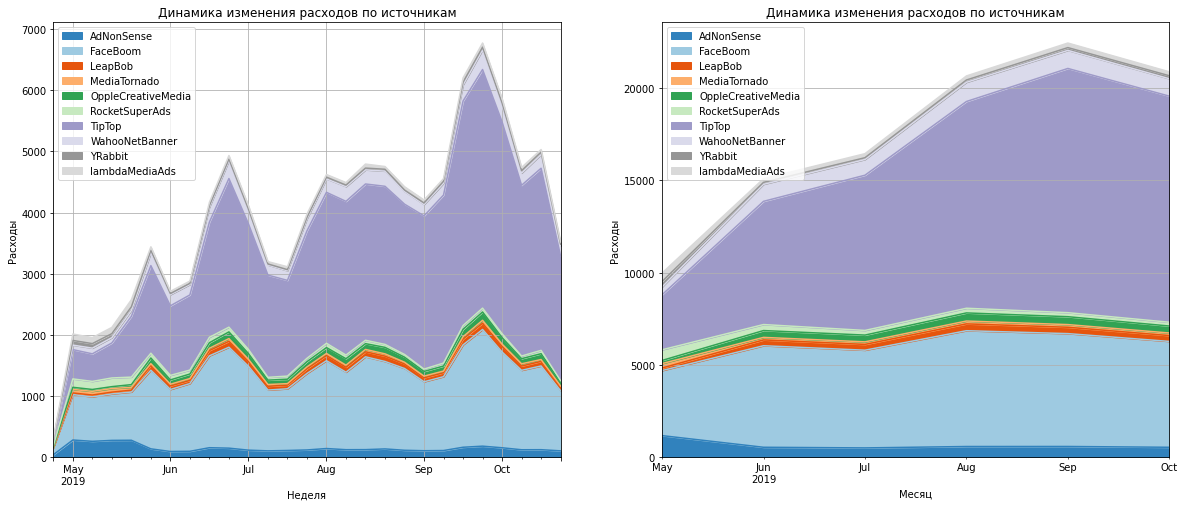

In [54]:
# Добавим в профили пользователей новые стобцы датой в формате недели и месяца.
profiles['week'] = profiles['dt'].astype('datetime64[W]')
profiles['month'] = profiles['dt'].astype('datetime64[M]')

## Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) для каждого источника.
profiles.query('channel != "organic"').pivot_table(index='week', columns='channel', 
                                                   values='acquisition_cost', aggfunc='sum').plot.area(
                                                   figsize=(20, 8), grid=True, ax=plt.subplot(1,2,1),
                                                   cmap='tab20c')
plt.title('Динамика изменения расходов по источникам')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.legend(loc='upper left')
profiles.query('channel != "organic"').pivot_table(index='month', columns='channel', 
                                                   values='acquisition_cost', aggfunc='sum').plot.area(
                                                   grid=True, ax=plt.subplot(1,2,2), cmap='tab20c')
plt.title('Динамика изменения расходов по источникам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(loc='upper left')
plt.show()

**Выводы:**
- На графиках видно, что изначально затраты на маркетинг по всем каналам кроме TipTop, FaceBoom и AdNonSense не превышали примерно 100 у.е. Затем происходит рост затрат на рекламу в канале WahooNetBanner примерно до 250 у.е., и далее затраты на этот канал и  предыдущие остаются стабильными на протяжении всего периода времени наблюдений. Канал AdNonSense стартует с 250-300 у.е., но примерно через месяц падает до 100-150 и также остается стабильным;
- Самые интересные результаты показывают каналы TipTop и FaceBoom. TipTop показывает резкий помесячный рост в течение почти всего периода до сентября, когда затраты дошли до 13 тыс у.е., затем за месяц резкое снижение до 12 тыс. у.е. FaceBoom рос волнообразно, в интервале с 3.8 тыс у.е до 5.9-6.2 тыс. у.е. за месяц. Чем обусловлены такие большие расходы на эти два источника непонятно. 

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


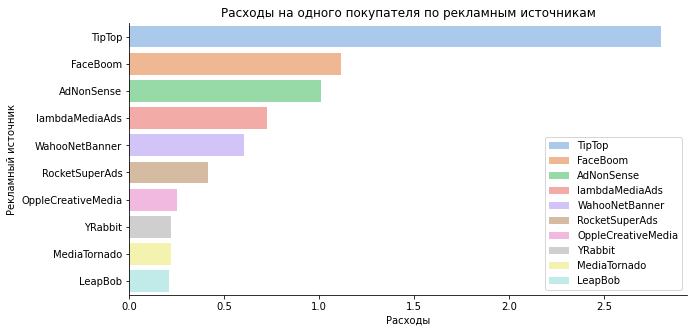

In [55]:
# Посчитаем среднюю стоимость привлечения одного пользователя (CAC) из каждого источника.
cac = profiles.query('channel != "organic"').groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(
    by='acquisition_cost', ascending=False).reset_index()
display(cac.style.background_gradient('Blues').format({'percent':'{:.2f}'}))

## Построим столбчатую расходов на одного покупателя по рекламным источникам.
plt.rcParams['figure.figsize'] = [10,5] 
sns.barplot(
    data = cac.sort_values(by='acquisition_cost', ascending=False), x='acquisition_cost', y='channel', 
    palette='pastel', hue='channel', dodge=False).set(
    title='Расходы на одного покупателя по рекламным источникам')
plt.ylabel('Рекламный источник')
plt.xlabel('Расходы')
plt.legend(loc='lower right')
sns.despine()
plt.show()

**Выводы:**
- Привлечение одного пользователя обошлось от 0.2 у.е. в LeapBob до 2.8 у.е. в TipTop;
- Расходы на одного покупателя в TipTop превышают расходы в других каналах более чем в 2 раза.

**Выводы по разделу Маркетинг:**
- Общая сумма затрат на рекламу составляет 105497.3 у.е.;
- По каналам TipTop и FaceBoom мы видим чрезвычайно высокие затраты на рекламу, составляющие 51.9% и 30.75% от общей суммы соответственно;
- По остальным каналам затраты составляют от 944 у.е до 5151 у.е.;
- Изначально затраты на маркетинг по большинству каналов, кроме TipTop, FaceBoom и AdNonSense, стартовали с суммы около 100 у.е. и далее остались стабильны. Каналы же TipTop и FaceBoom показывают помесячный рост затрат на рекламу;
- Привлечение одного пользователя обошлось в сумму от 0.2 у.е. в LeapBob до 2.8 у.е. в TipTop;
- Расходы на одного покупателя в TipTop превышают расходы в других каналах более чем в 2 раза.

<a id="5"></a>

## Оценим окупаемость рекламы

In [56]:
# Исключим из данных органических пользователей и определим момент и горизонт анализа.
profiles = profiles.query('channel != "organic"')
observation_date = datetime(2019, 11, 1).date()
analysis_horizon = 14

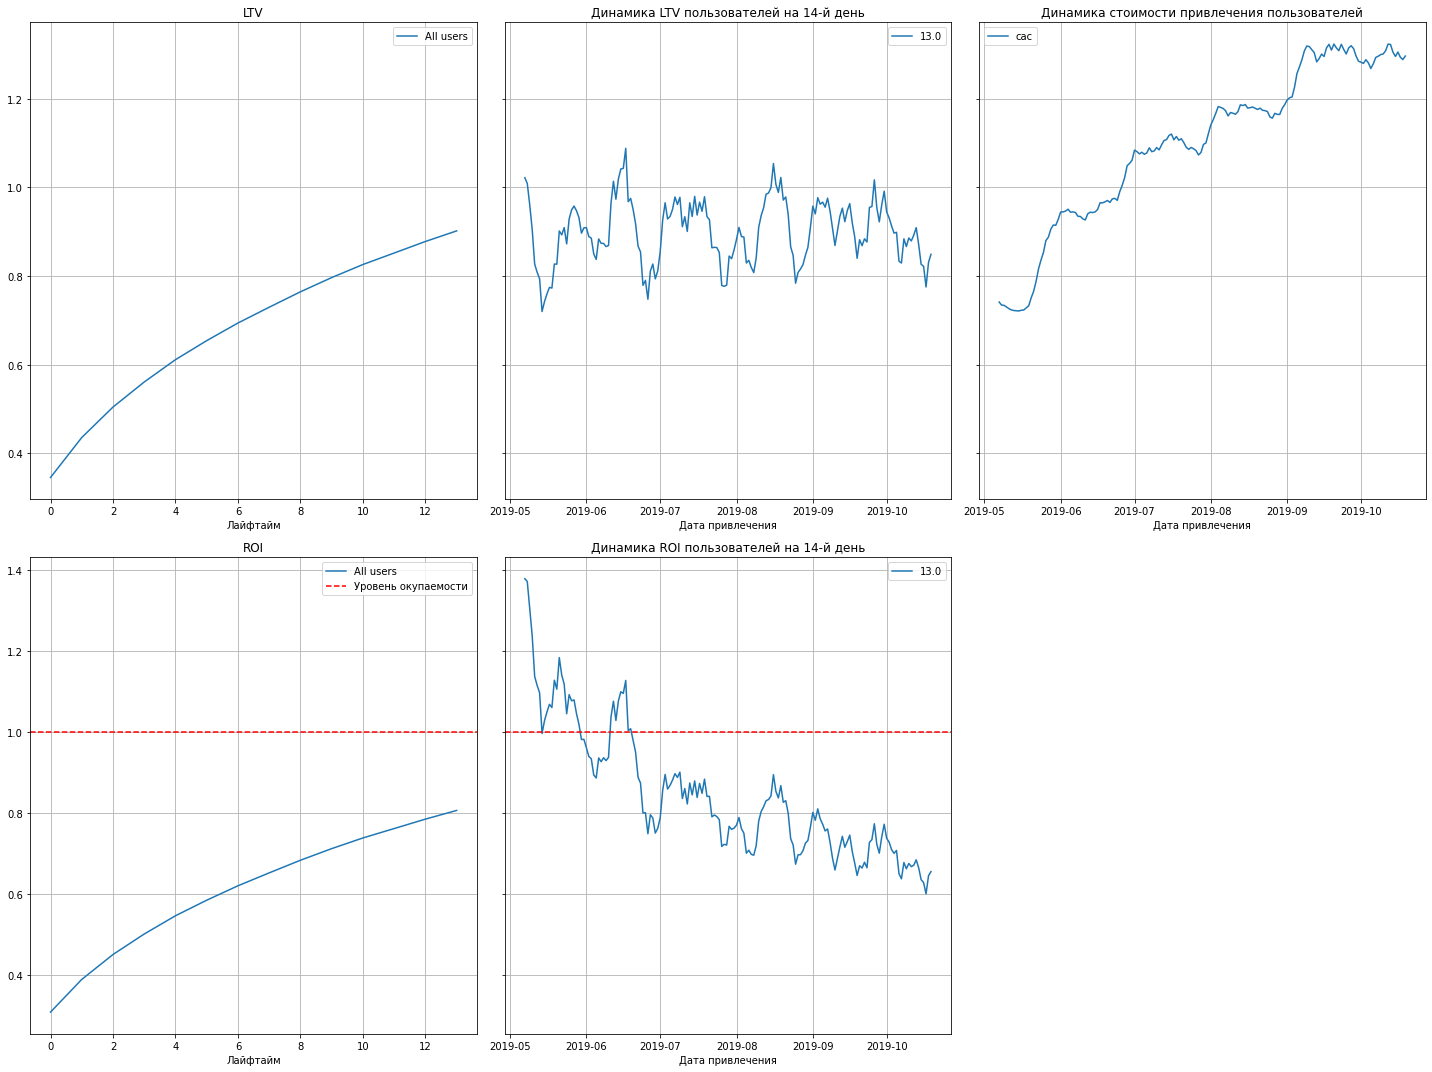

In [57]:
# Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    analysis_horizon,)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon) 

**Выводы:**
- LTV стабильно растет, это хорошо, прибыль с каждого клиента увеличивается;
- Стоимость привлечения пользователей (CAC) растет каждый месяц;
- К концу второй недели инвестиции в рекламу не окупились, ROI составил около 80%;
- Инвестиции в рекламу окупались  в первый месяц, затем произошел спад, в середине  июня произошел всплеск окупаемости (с чем он был связан непонятно), затем окупаемость начала стабильно снижаться.

### Анализ конверсии пользователей

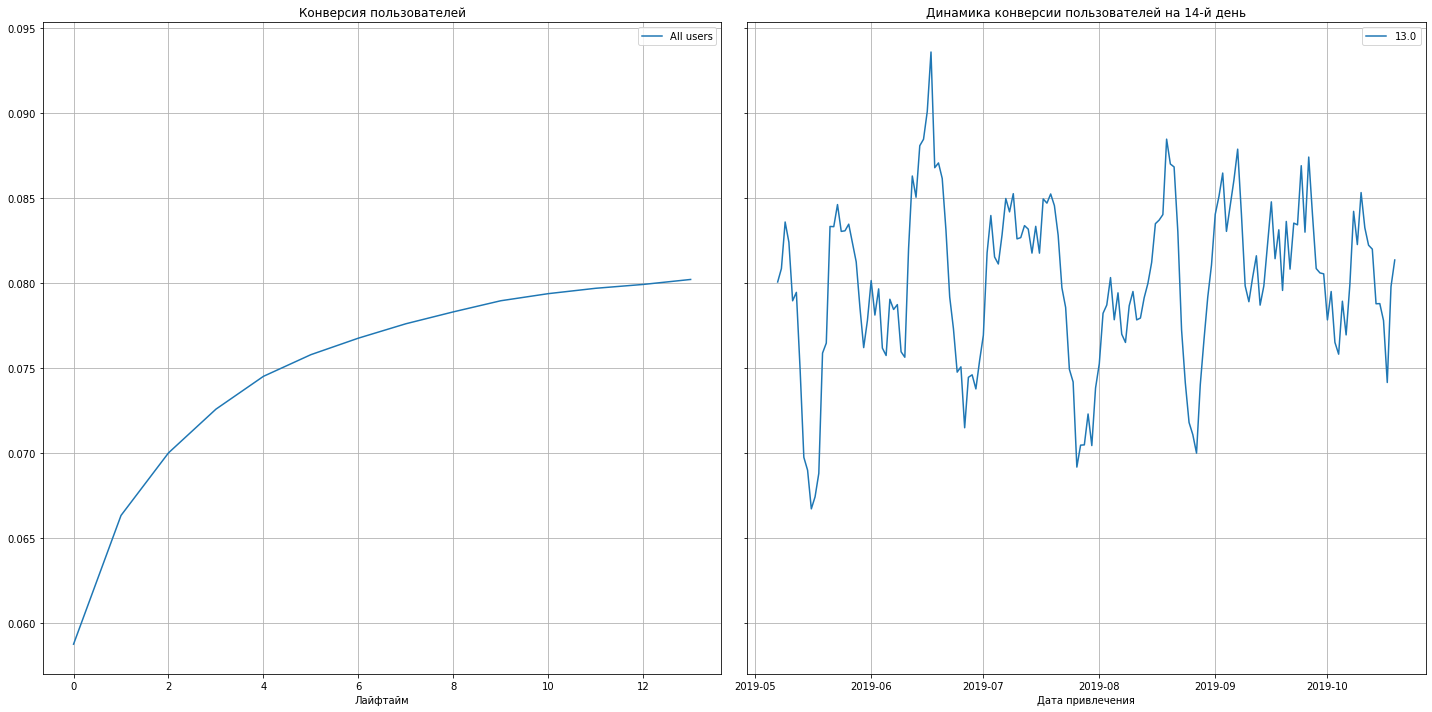

In [58]:
# Построим графики конверсии (Conversion Rate) и динамики ее изменений.
conversion_raw, conversion, conversion_history = get_conversion(
    profiles,
    orders,
    observation_date,
    analysis_horizon,)
plot_conversion(conversion, conversion_history, analysis_horizon) 

**Выводы:**
- Конверсия пользователей резко растет в первые 4 дня "жизни", затем рост замедляется. 

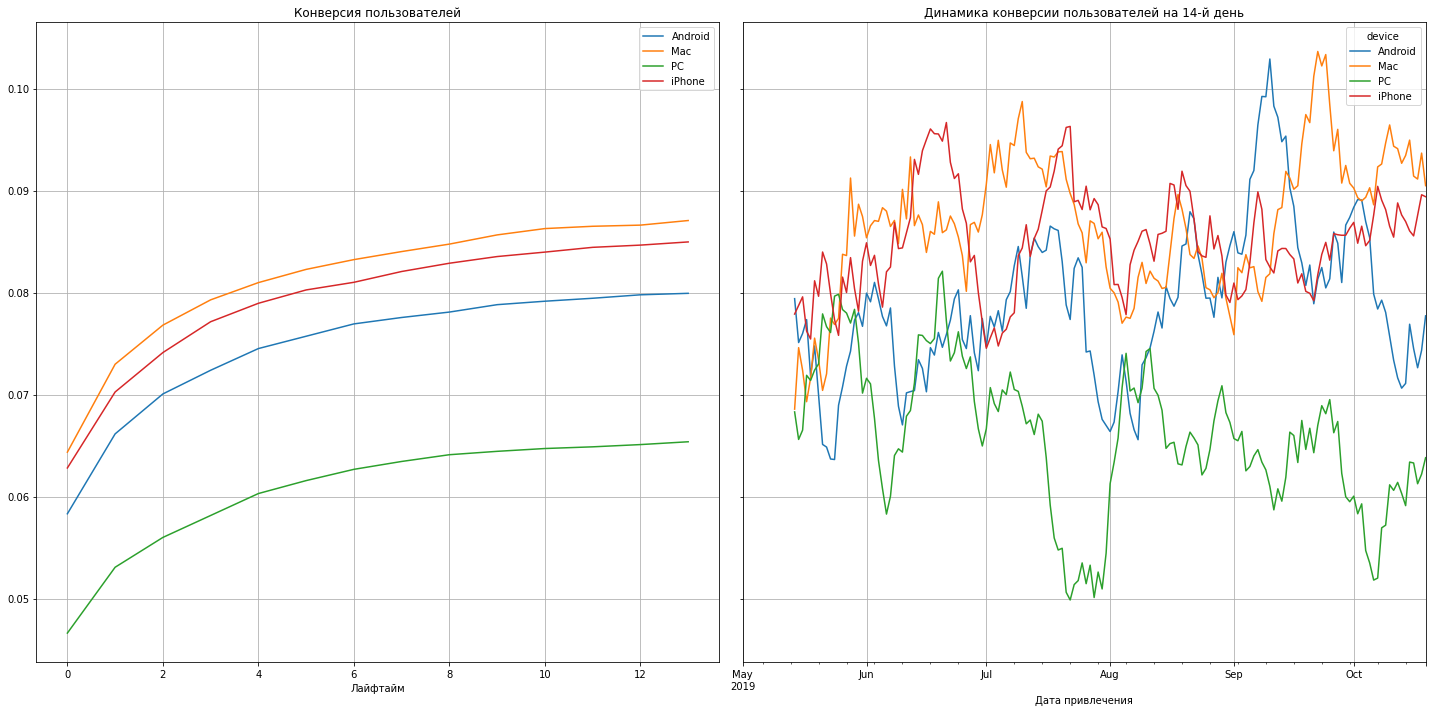

In [59]:
# Проанализируем конверсию с разбивкой по устройствам с окном 14 дней.
dimensions = ['device']
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date, 
    analysis_horizon, 
    dimensions=dimensions
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=14) 

**Выводы:**
- Конверсия пользователей всех устройств растет. У пользователи Mac, iPhone  и Android хорошо конвертируются примерно ко второму дню, затем рост плавно замедляется, рост конверсии пользователей PC замедляется после 4го дня;
- Конверсия пользователей PC сильнее остальных проседает в летние месяцы (июль-август), возможно это связано с сезоном отпусков и немобильностью данного устройства;
- С середины августа по октябрь Mac и Android показывают рост конверсии, затем по всем устройствам, кроме iPhone конверсия начинает падать. Конверсия iPhone в осенние месяцы довольно стабильна.

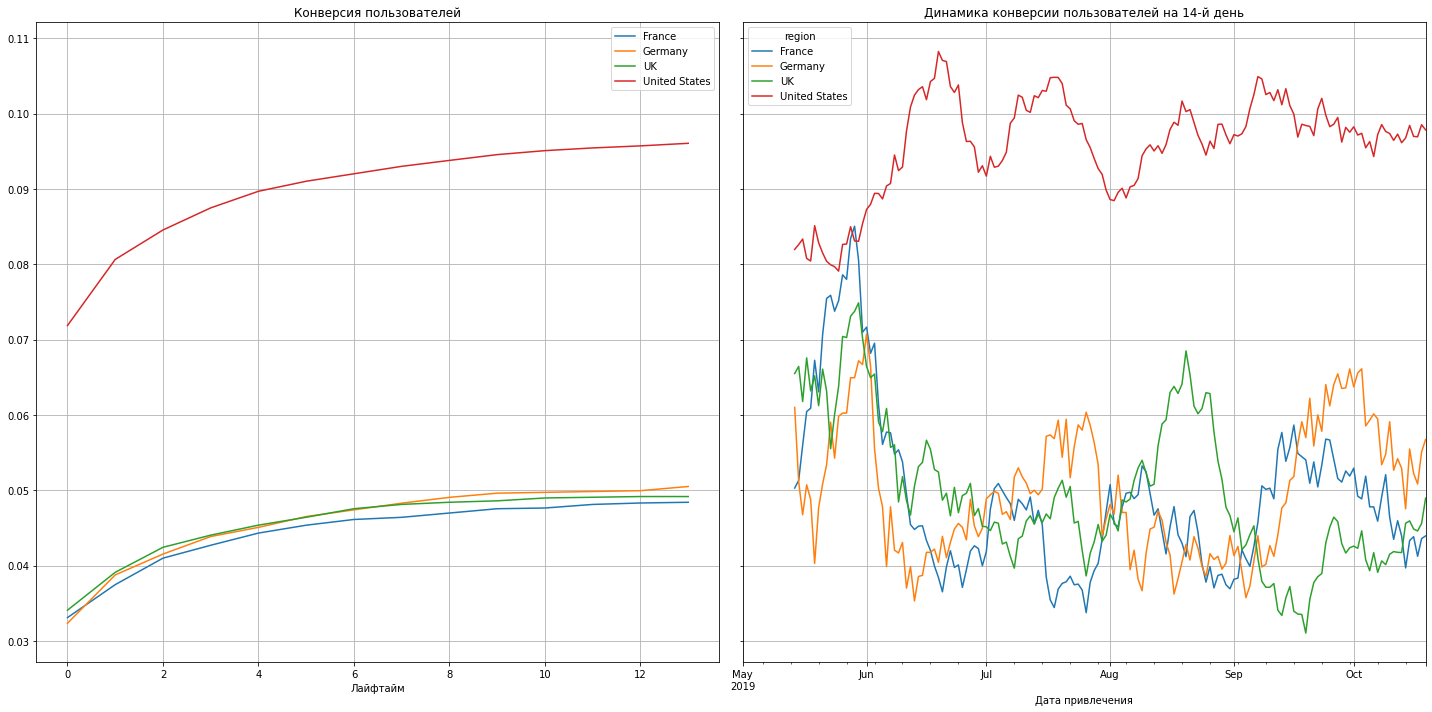

In [60]:
# Проанализируем конверсию с разбивкой по странам с окном 14 дней.
dimensions = ['region']
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date, 
    analysis_horizon, 
    dimensions=dimensions
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=14) 

**Выводы:**
- Интересная картина получается: конверсия пользователей США уже на старте сильно выше, чем у других, хорошо растет до 4го дня. В других странах конверсия показывает хороший рост ко 2му дню, затем растет уже не так быстро;
- С мая по июнь Германия, Франция и Великобритания показали резкий рост конверсии, после чего произошло падение и конверсия стабилизировалась с небольшими всплесками активности пользователей в августе в Великобритании, и в сентябре во Франции и Германии;
- В США же в мае конверсия была небольшая, но вот с июня произошел резкий рост, следующий пик - в середине июля, начиная с сентября она была стабильно высокой.

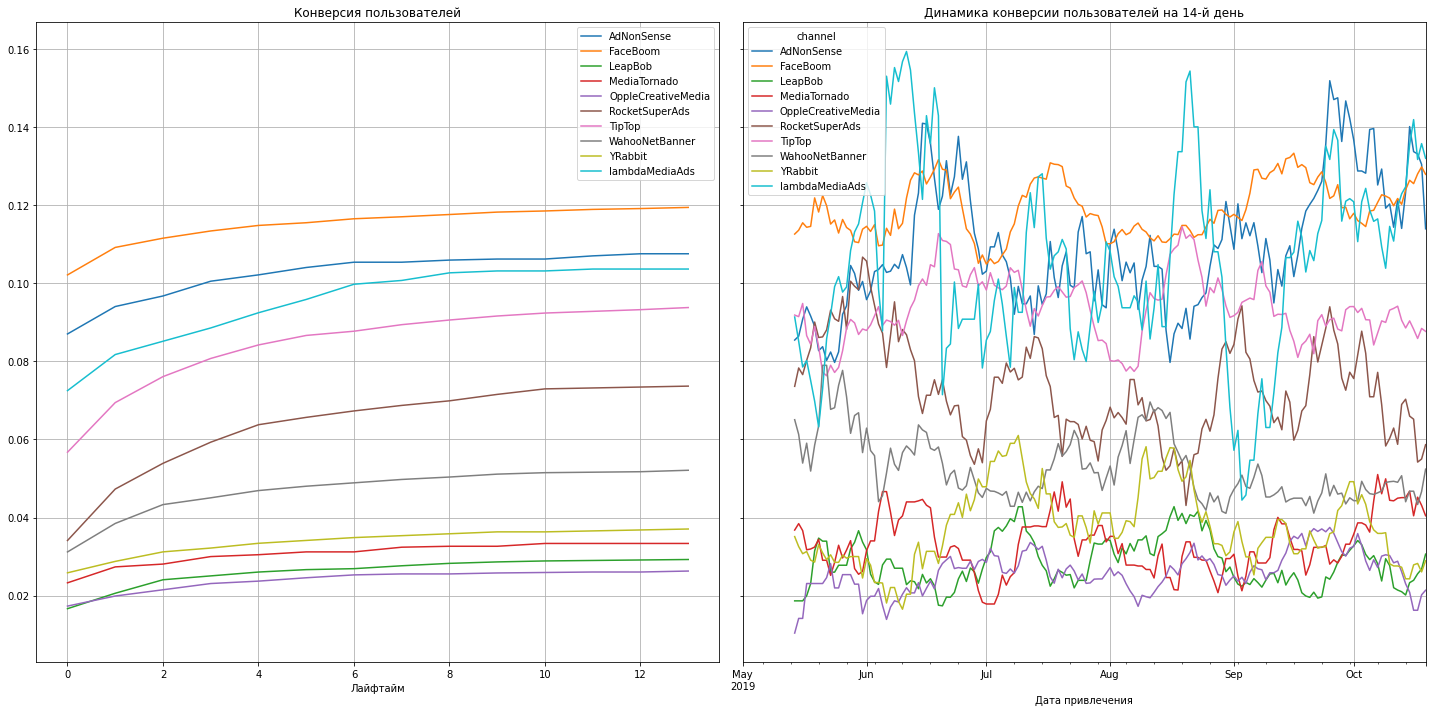

In [61]:
# Проанализируем конверсию с разбивкой по рекламным каналам с окном 14 дней.
dimensions = ['channel']
conversion_raw, conversion, conversion_history = get_conversion(
    profiles, 
    orders, 
    observation_date, 
    analysis_horizon, 
    dimensions=dimensions
)
plot_conversion(conversion, conversion_history, analysis_horizon, window=14) 

**Выводы:**
- Изначально самая высокая конверсия была у FaceBoom, AdNonSense, lambdaMediaAds и TipTop;
- Рост конверсии у FaceBoom замедлился фактически сразу после 1го дня, у AdNonSense и TipTop примернос 3го, а вот у lambdaMediaAds конверсия хорошо росла аж до 6го дня;
- Также хорошо себя показал RocketSuperAds, рост конверсии замедлился после 4го дня, при этом изначальная конверсия была ниже, чем у вышеперечисленных каналов привлечения;
- Мы видим помесячную стабильность в каналах YRabbit, MediaTornado, LeapBop и OppleCreativeMedia. Возможно стоит обратить на них больше внимания.

### Анализ удержания пользователей

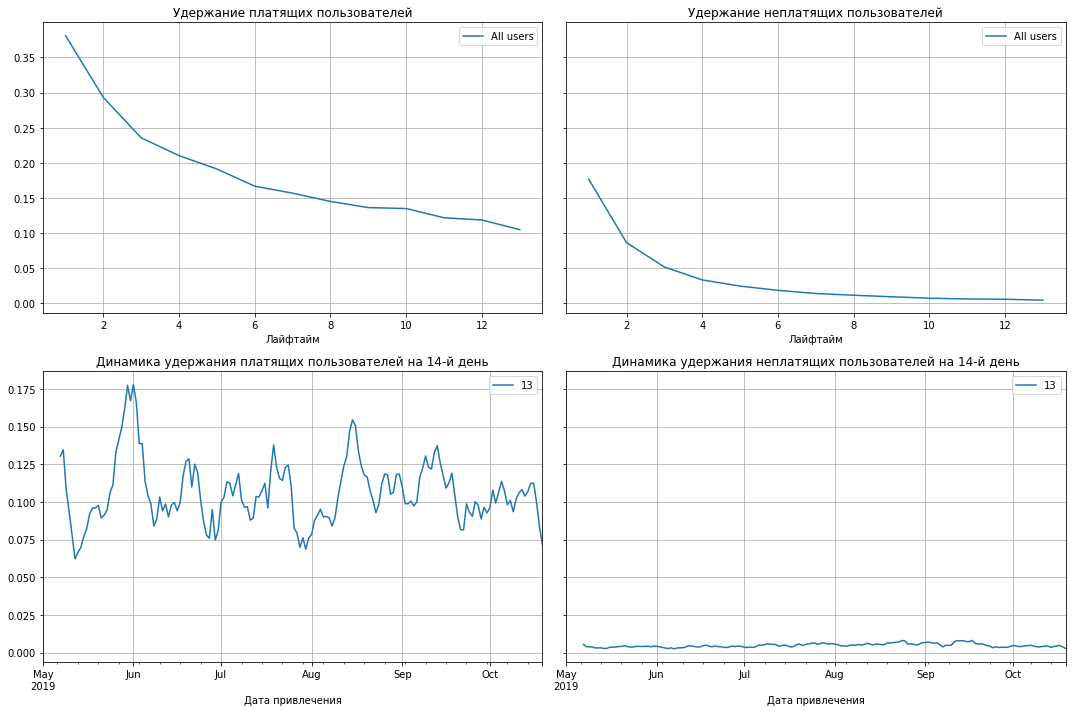

In [62]:
# Построим графики удержания (Renention Rate) и динамику его изменений.
retention_raw, retention, retention_history = get_retention(
    profiles, 
    visits, 
    observation_date, 
    analysis_horizon,)
plot_retention(retention, retention_history, analysis_horizon) 

**Вывод:**
- Платящие пользователи: удержание на первый день "жизни" составляет около 40%. К концу исследуемого периода остается около 10%. Динамика удержания колеблется от 7% до 12-13% на 14ый день, максимальное удержание было в начале июня, порядка 17%;
- Неплатящие пользователи: удержание на первый день "жизни" составляет около  17%, к концу исследуемого периода оно плавно стремится к нулю.

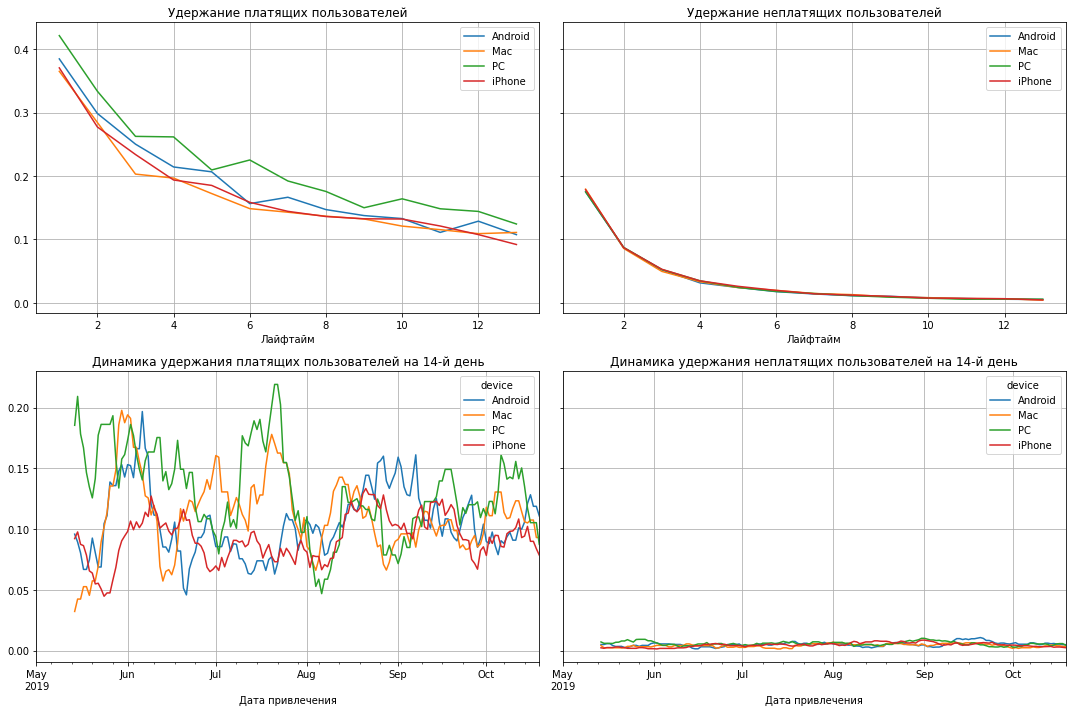

In [63]:
# Проанализируем удержание с разбивкой по устройствам с окном 14 дней.
dimensions = ['device']
retention_raw, retention, retention_history = get_retention(
    profiles, 
    visits, 
    observation_date, 
    analysis_horizon, 
    dimensions=dimensions
)
plot_retention(retention, retention_history, analysis_horizon, window=14) 

**Выводы:**
- Платящие пользватели: судя по графику, стабильнее всего удерживаются пользователи PC, правда с падениями в середине июня и июля (выше уже делала предположение про сезон отпусков);
- Довольно стабильно ведут себя пользователи iPhone, не вижу прям очень резких провалов на графике;
- Неплатящие пользователи: тут все стабильно плохо. Начиная со второго дня удержание неумолимо стримится к нулю.

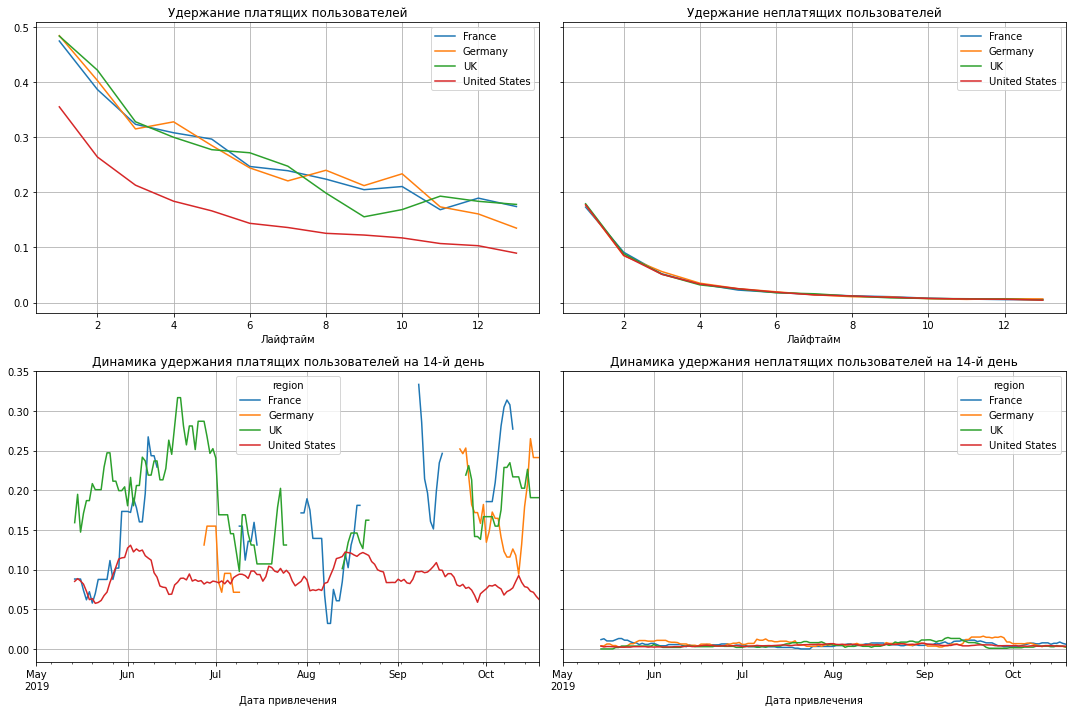

In [64]:
# Проанализируем удержание с разбивкой по странам с окном 14 дней.
dimensions = ['region']
retention_raw, retention, retention_history = get_retention(
    profiles, 
    visits, 
    observation_date, 
    analysis_horizon, 
    dimensions=dimensions
)
plot_retention(retention, retention_history, analysis_horizon, window=14) 

**Выводы:**
- Платящие пользователи: и снова интересная картина с США. Несмотря на высокую конверсию мы видим самое стабильно низкое удержание;
- Вижу прерывистый график по странам Европы и Великобритании, не знаю с чем это связано...с недостатком данных? Но судя по нему пользователи неплохо удерживаются в UK;
- Неплатящие пользователи: все снова стабильно падает.

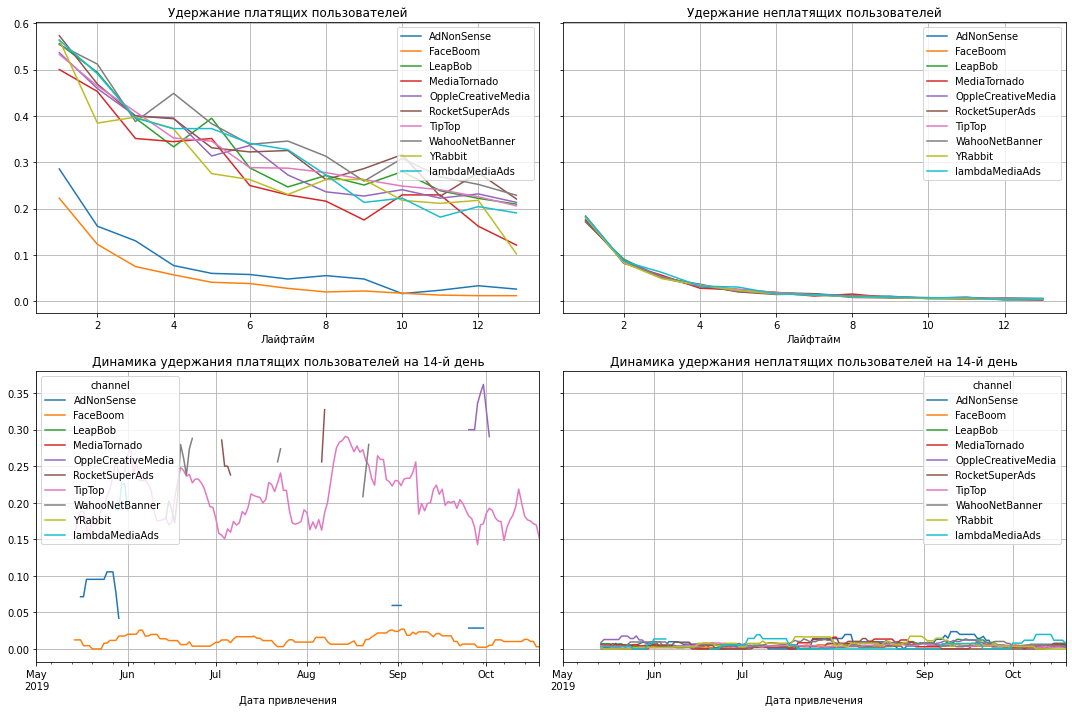

In [65]:
# Проанализируем удержание с разбивкой по рекламным каналам с окном 14 дней.
dimensions = ['channel']
retention_raw, retention, retention_history = get_retention(
    profiles, 
    visits, 
    observation_date, 
    analysis_horizon, 
    dimensions=dimensions
)
plot_retention(retention, retention_history, analysis_horizon, window=14) 

**Выводы:**
- Платящие пользователи: хуже всего удерживаются пользователи с FaceBoom и AdNonSense, TipTop более стабилен;
- Неплатящие пользователи: небольшие всплески активности можено видеть в середине каждого месяца на lambdaMediaAds и YRabbit, но в целом удержание стабильно плохое.

### Анализ окупаемости рекламы

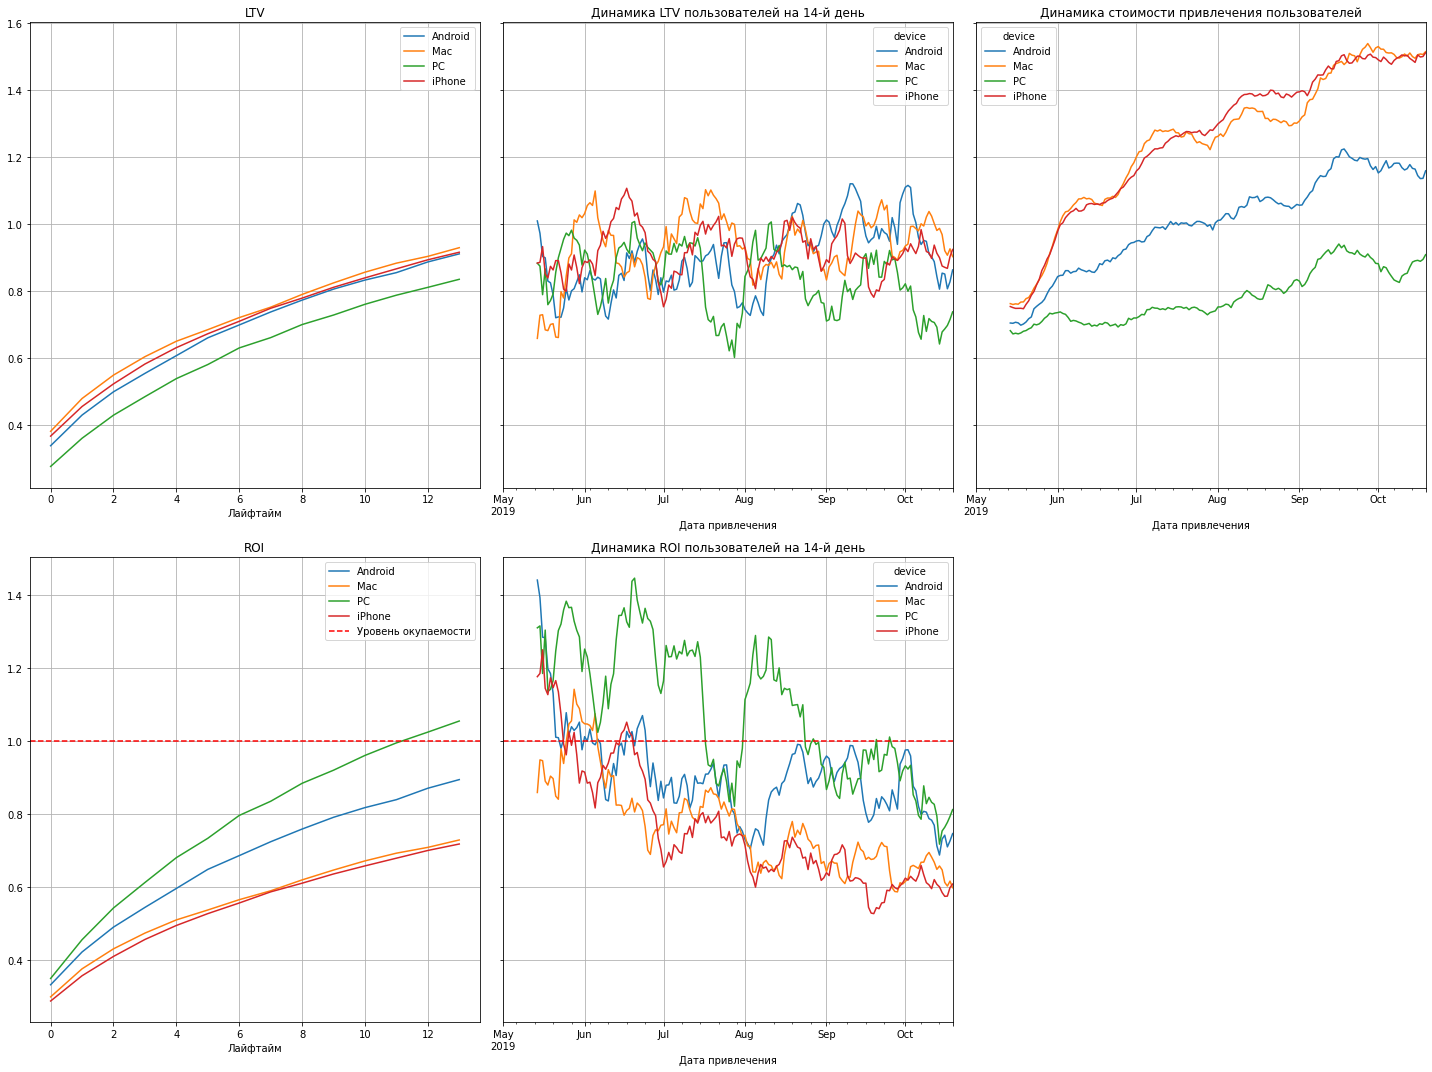

In [66]:
# Построим графики окупаемости рекламы с разбивкой по устройствам (со сглаживанием данных с окном 14 дней).
dimensions = ['device']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    analysis_horizon,
    dimensions=dimensions,)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon,  window=14) 

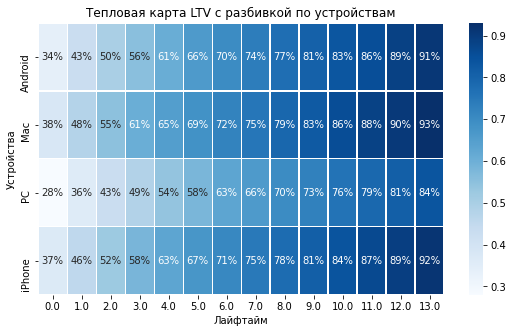

In [67]:
# Построим хитмэп окупаемости с разбивкой по устройствам.
plt.figure(figsize=(20, 5))
sns.heatmap(
    ltv.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.0%', 
    ax=plt.subplot(1, 2, 2),
    cmap='Blues', 
    vmin=0.28, 
    vmax=0.93,
    linewidths=0.2
   )
plt.title('Тепловая карта LTV с разбивкой по устройствам')
plt.xlabel('Лайфтайм')
plt.ylabel('Устройства')
plt.show()

**Выводы:**
- LTV пользователей всех устройств стабильно растёт;
- LTV пользователей PC ниже, чем пользователей других устройств, вероятно дело в том, что все остальные устройства портативные или мобильные;
- Затраты на привлечение держателей Mac и iPhone значительно выше, чем на привлечение пользователей с Android и PC, но и LTV с каждого клиента выше у продуктов компании Apple;
- Но окупаются при этом  только пользователи PC на 11 день лайфтайма;
- Динамика окупаемости показывает, что в мае-июне окупались практически все пользователи, а далее у всех окупаемость начала падать;
- Быстрее всего падала окупаемость пользователей Mac и iPhone;
- Пользователи PC окупались дольше всего, почти до сентября, затем окупаемость ушла в минус для пользователей всех устройств.

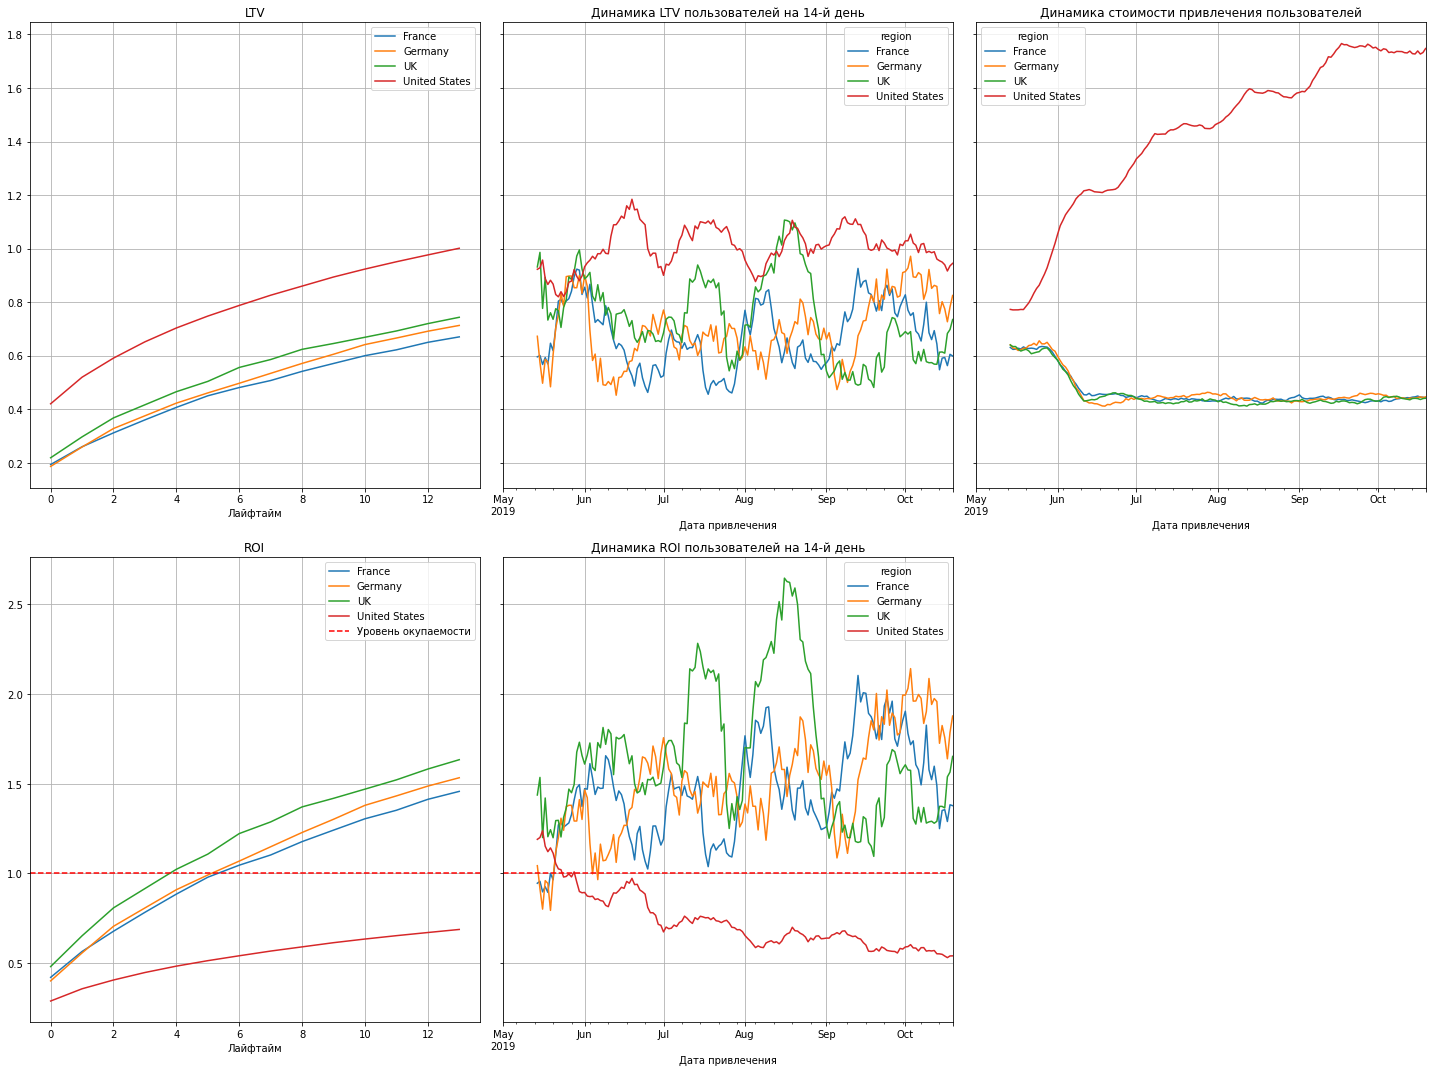

In [68]:
# Построим графики окупаемости рекламы с разбивкой по странам (со сглаживанием данных с окном 14 дней).
dimensions = ['region']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    analysis_horizon,
    dimensions=dimensions,)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon,  window=14) 

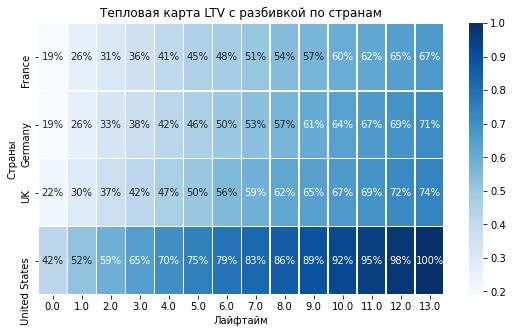

In [69]:
# Построим хитмэп окупаемости с разбивкой по странам.
plt.figure(figsize=(20, 5))
sns.heatmap(
    ltv.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.0%', 
    ax=plt.subplot(1, 2, 2),
    cmap='Blues', 
    vmin=0.19, 
    vmax=1.0,
    linewidths=0.2
   )
plt.title('Тепловая карта LTV с разбивкой по странам')
plt.xlabel('Лайфтайм')
plt.ylabel('Страны')
plt.show()

**Выводы:**
- LTV пользователей всех стран стабильно растёт;
- LTV пользователей из США значительно выше, чем в других странах. И составляет 100% к концу исследуемого периода. Выглядит странно.
- Затраты на привлечение пользователей из США выше, чем в других странах и показывают сильный рост в течение всего исследуемого периода, тогда как в середине июня затраты на привлечение пользователей в других странах снизились и остались стабильны до октября; 
- А вот с окупаемостью в США большие проблемы, несмотря на затраты на привлечение пользователей и хороший LTV, такое привлечение не окупилось;
- В Германии, Франции и Великобритании затраты окупились начиная с 4-5 дней и стабильно окупались до конца периода исследования;
- Динамика окупаемости показывает, что к концу с середины мая окупаемость рекламы в США вышла в минус, примерно в это же время начали расти затраты на рекламу по этой стране;
- Возможно именно в этом кроется причина убыточности приложения Procrastinate Pro+.

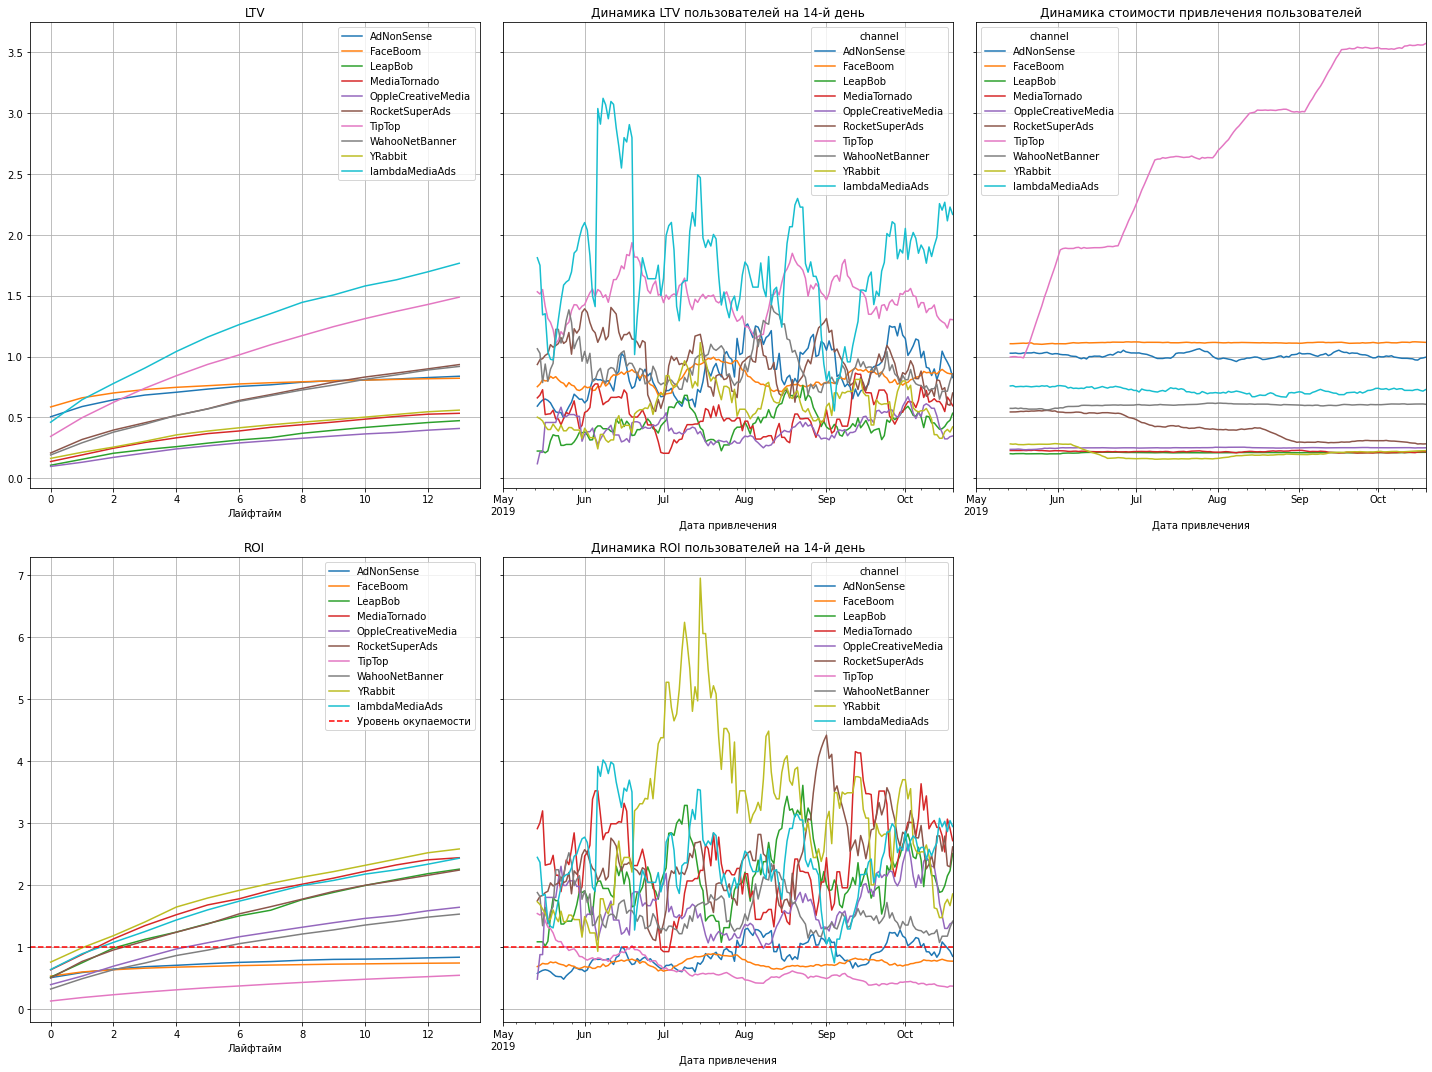

In [70]:
# Рассчитаем окупаемость рекламы с разбивкой по рекламным каналам (со сглаживанием данных с окном 14 дней).
dimensions = ['channel']
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles,
    orders,
    observation_date,
    analysis_horizon,
    dimensions=dimensions,)
plot_ltv_roi(ltv, ltv_history, roi, roi_history, analysis_horizon,  window=14)

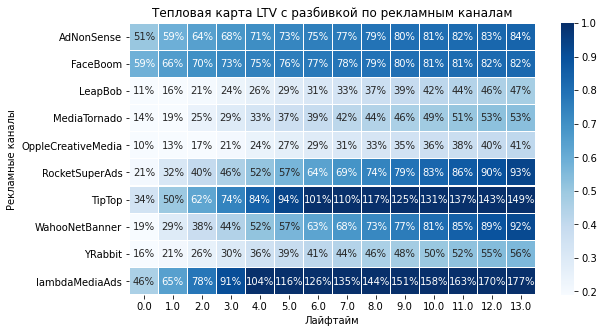

In [71]:
# Построим хитмэп окупаемости с разбивкой по рекламным каналам.
plt.figure(figsize=(20, 5))
sns.heatmap(
    ltv.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.0%', 
    ax=plt.subplot(1, 2, 2),
    cmap='Blues', 
    vmin=0.19, 
    vmax=1.0,
    linewidths=0.2
   )
plt.title('Тепловая карта LTV с разбивкой по рекламным каналам')
plt.xlabel('Лайфтайм')
plt.ylabel('Рекламные каналы')
plt.show()

**Выводы:**
- LTV пользователей, пришедших со всех каналов рекламы растет;
- "Пожизненная" ценность клиента выше у пользователей пришедших с TipTop и lambdaMediaAds;
- Из всех каналов рекламы только у TipTop резко растет динамика стоимости привлечения покупателей;
- Как следствие, пользователи с TipTop не окупаются;
- Не окупаются также пользователи с FaceBoom и AdNonSense, два источника с наиболее высокой стоимостью покупателей после TipTop;
- Пользователи с других каналов окупились, при этом их стоимость ниже вышеперечисленных каналов, так что можно записать их в лист перспективных. Возглавят этот лист определенно Yrabbit, lambdaMediaAds, MediaTornado.

**Выводы по разделу Окупаемость рекламы:**
- Несмотря на рост LTV, ROI составляет около 80%. CAC также растет;
- Конверсия пользователей хорошо растет в первые 4дня, затем рост замедляется;
- При росте конверсии среди пользователей  PC хуже, чем у остальных, они единственные окупаются в итоге;
- Конверсия в США очень высокая по сравнению с другими странами, затраты на привлечение пользователей самые высокие, а вот удержание очень низкое, и ROI тут самый низкий, пользователи из США не окупаются;
- Самая высокая конверсия у пользователей, привлеченных с FaceBoom, TipTop и AdNonSense;
- Платящие пользователи стабильно лучше удерживаются, чем неплатящие;
- Хуже всего удерживаются  пользователи, пришедшие с рекламных каналов FaceBoom и AdNonSense;
- Привлечение пользователи девайсов Apple обходится дороже всего, но они не окупаются;
- Хуже всего окупаются пользователи, пришедшие из рекламного канала TipTop, так как затраты на их привлечение самые высокие. Пользователи из двух других самых дорогостоящих каналов (FaceBoom, AdNonSense) тоже не окупились;
- Рекламному отделу рекомендуется обратить внимание на слишком высокие затраты на привлечение пользователей из США, пользователей девайсов Apple и стоимость пользователей, пришедших с каналов TipTop и FaceBoom, в первую очередь.

<a id="6"></a>

## Напишем выводы


**Общие выводы:**
 
Мы провели исследование данных для развлекательного приложения Procrastinate Pro+ за период с 1 мая по 27 октября 2019 года с целью выявить причины, по которым, несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.
 
***Исследование состояло из следующих этапов:***

- ***Загрузка и предобработка данных:***
  - Прочитали файлы с данными;
  - Вывели и изучили общую информацию о них;
  - Привели названия столбцов к единой стилистике;
  - Преобразовали типы данных в стобцах с датами во временной формат;
  - Проверили данные на пропуски - их нет;
  - Проверили данные на дубликаты - их нет.

- ***Исследовательский анализ данных:***
  - Минимальная дата привлечения пользователей - 1 мая 2019 года;
  - Максимальная дата привлечения пользователей - 27 октября 2019;
  - Пользователи приложения приходят из 4х стран: США, Великобритания, Германия и Франция. Больше всего платящих пользователей приходится на США - 6.9% от общего числа, во Франции меньше всего - 3.8%;
  - Пользователи приложения пользуются следующими устройствами: Mac, iPhone, Android и PC. Платящие пользователи предпочитают iPhone, но самая большая доля платящих от общего числа пользователей приходится на Mac - 6.36%;
  - Рекламных источников привлечения 10, не считая источника органических пользователей (organic): FaceBoom, AdNonSense, YRabbit, MediaTornado, RocketSuperAds, LeapBob, TipTop, WahooNetBanner, OppleCreativeMedia, lambdaMediaAds;
  - По количеству пришедших платящих пользователей наиболее выгодны каналы FaceBoom и TipTop, а также органические пользователи;
  - В процентном соотношении по платящим от общего числа пользователей расклад немного другой: FaceBoom - 12.2%, AdNonSense - 11.34%, lambdaMediaAds -10.47%, при этом необходимо учитывать, что в двух последних довольно небольшое по сравнению с первым каналом число пользователей, но доля платящих почти такая же.
  
- ***Маркетинговый анализ данных:***
  - Общая сумма затрат на рекламу составляет 105497.3 у.е.;
  - По каналам TipTop и FaceBoom мы видим чрезвычайно высокие затраты на рекламу, составляющие 51.9% и 30.75% от общей суммы соответственно;
  - По остальным каналам затраты составляют от 944 у.е (YRabbit) до 5151 у.е.(WahooNetBanner);
  - Изначально затраты на маркетинг по большинству каналов, кроме TipTop, FaceBoom и AdNonSense, стартовали с суммы около 100 у.е. и далее остались стабильны;
  - Каналы TipTop и FaceBoom показывают помесячный рост затрат на рекламу от 400 у.е. на старте и до 13000 у.е. в сентябре 2019 г., и от 500 у.е. на старте и до 6200 у.е. к концу исследуемого периода соответственно;
  - Привлечение одного пользователя обошлось в сумму от 0.2 у.е. в LeapBob до 2.8 у.е. в TipTop;
  - Расходы на одного покупателя в TipTop превышают расходы в следующих за ним в списке каналах более чем в 2 раза.

- ***Оценка окупаемости рекламы:***
  - Несмотря на рост ценности клиента (LTV), окупаемость инвестиций (ROI) составляет около 80%. Стоимость привлечения одного клиента (CAC) также растет;
  - Конверсия пользователей хорошо растет в первые 4дня, затем рост замедляется;
  - При росте конверсии среди пользователей PC хуже, чем у остальных, они единственные окупаются;
  - Конверсия в США очень высокая по сравнению с другими странами, затраты на привлечение пользователей самые высокие, а вот удержание и окупаемость самые низкие, пользователи из США не окупаются;
  - Самая высокая конверсия у пользователей, привлеченных с FaceBoom, TipTop и AdNonSense;
  - Платящие пользователи стабильно лучше удерживаются, чем неплатящие;
  - Хуже всего удерживаются пользователи, пришедшие с рекламных каналов FaceBoom и AdNonSense;
  - Привлечение пользователи девайсов Apple обходится дороже всего, но они не окупаются;
  - Хуже всего окупаются пользователи, пришедшие из рекламного канала TipTop, так как затраты на их привлечение самые высокие. Пользователи из двух других самых дорогостоящих каналов (FaceBoom, AdNonSense) тоже не окупились;
  - Рекламному отделу рекомендуется обратить внимание на слишком высокие затраты на привлечение пользователей из США, пользователей девайсов Apple и стоимость пользователей, пришедших с каналов TipTop и FaceBoom, в первую очередь.

Таким образом, на основании вышеизложенного, можно сделать следующие выводы о причинах убыточности компании за последние несколько месяцев:

***Причины неэффективности привлечения пользователей:***

- Слишком дорогостоящая рекламная компания по привлечению пользователей в США. После того как в середине июня 2019 г. резко увеличились расходы на стоимость привлечения пользователей в США, окупаемость сразу резко пошла вниз. Вероятно, дорогостоящая реклама не возымела своего эффекта. При этом удержание пользователей там также самое низкое;
- Много внимания уделяется пользователям модных девайсов компании Apple, возможно потому, что среди них больше всего "платящих", и недостаточно - пользователям PC, хотя, как показывает анализ, они единственные окупаются к 11му дню "лайфтайма";
- Слишком большие затраты на рекламные каналы TipTop и FaceBoom, соответственно, пользователи, пришедшие оттуда  не окупились. Удержание пользователей из этих каналов плюс из канала AdNonSense также низкое.

***Рекомендации для отдела маркетинга:***

- Рекомендую обратить внимание на владельцев PC, они лучше всего удерживаются и единственные окупаются. Однако июль и август не самые лучшие месяцы для вложений в их привлечение, т.к. тут играет роль сезонность (отпускной период), когда стационарные устройства становятся менее доступны, чем мобильные;
- Вторые по перспективности - пользователи Android;
- Рекомендую урезать расходы на рекламу в США и сместить фокус внимания на пользователей из Великобритании и Германии, они неплохо удерживаются и окупаются, среди них неплохой после США процент платящих (3.98% и 4.11% соответственно);
- Рекомендую уменьшить расходы на рекламу на каналах TipTop, FaceBoom и AdNonSense, где пользователи плохо удерживаются и не окупаются;
- Перспективные, стабильные по удержанию и окупаемости, рекламные каналы: YRabbit, MediaTornado и lambdaMediaAds. Они также замыкают список источников как тройка самых недорогих рекламных каналов (944 у.е., 954 у.е., 1558 у.е. за весь период).